Tristan Hoellinger<br/>
Institut d'Astrophysique de Paris</br>
tristan.hoellinger@iap.fr

# Plot time step convergence tests

## Set up the environment and parameters

In [1]:
# pyright: reportWildcardImportFromLibrary=false
import numpy as np

from pysbmy.fft import read_FourierGrid
from pysbmy.field import read_field
from pysbmy.correlations import get_autocorrelation

from wip3m import *
from wip3m.plot_utils import *

In [2]:
workdir = ROOT_PATH + "results/"
output_path = OUTPUT_PATH

run_id = "ts1"

nsteps_pmref = 200
nsteps_pm1 = 100
nsteps_pm2 = 20
nsteps_cola = 10
nsteps_spm = nsteps_p3m1 = 200
nsteps_p3m2 = 100
nsteps_p3m3 = 20

In principle nothing needs to be changed below this cell.

In [3]:
simdir = output_path + run_id + "/"
input_ss_file = simdir + "input_ss_k_grid.h5"
wd = workdir + run_id + "/"
with open(wd + "sim_params.txt", "r") as f:
    sim_params = eval(f.read())
L = sim_params["L"]  # Box size in Mpc/h
N = sim_params["N"]  # Density grid size
Np = sim_params["Np"]  # Number of dark matter particles per spatial dimension
Npm = sim_params["Npm"]  # PM grid size

## Plot results

### Plot the evolved dark matter density fields

In [4]:
slice_ijk = (N // 2, slice(None), slice(None))
DELTA_LPT = read_field(simdir + "lpt_density.h5").data[slice_ijk]
DELTA_PMREF = read_field(simdir + f"pmref_nsteps{nsteps_pmref}_final_density_pm.h5").data[slice_ijk]
DELTA_PM1 = read_field(simdir + f"pm1_nsteps{nsteps_pm1}_final_density_pm.h5").data[slice_ijk]
DELTA_PM2 = read_field(simdir + f"pm2_nsteps{nsteps_pm2}_final_density_pm.h5").data[slice_ijk]
DELTA_COLA = read_field(simdir + f"cola_nsteps{nsteps_cola}_final_density_cola.h5").data[slice_ijk]
DELTA_SPM = read_field(simdir + f"spm_nsteps{nsteps_spm}_final_density_spm.h5").data[slice_ijk]
DELTA_P3M1 = read_field(simdir + f"p3m1_nsteps{nsteps_p3m1}_final_density_p3m.h5").data[slice_ijk]
DELTA_P3M2 = read_field(simdir + f"p3m2_nsteps{nsteps_p3m2}_final_density_p3m.h5").data[slice_ijk]
DELTA_P3M3 = read_field(simdir + f"p3m3_nsteps{nsteps_p3m3}_final_density_p3m.h5").data[slice_ijk]
diff_pm1_pmref = DELTA_PM1 - DELTA_PMREF
diff_pm2_pmref = DELTA_PM2 - DELTA_PMREF
diff_p3m1_pmref = DELTA_P3M1 - DELTA_PMREF
diff_p3m2_pm1 = DELTA_P3M2 - DELTA_PM1
diff_p3m3_pm2 = DELTA_P3M3 - DELTA_PM2
diff_p3m1_spm = DELTA_P3M1 - DELTA_SPM

[23:34:28|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/lpt_density.h5'...
[23:34:28|DIAGNOSTIC]==|ranges=[np.float64(-16.0), np.float64(16.0), np.float64(-16.0), np.float64(16.0), np.float64(-16.0), np.float64(16.0), np.int32(128), np.int32(128), np.int32(128)]
[23:34:28|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/lpt_density.h5' done.
[23:34:28|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/pmref_nsteps200_final_density_pm.h5'...
[23:34:28|DIAGNOSTIC]==|ranges=[np.float64(-16.0), np.float64(16.0), np.float64(-16.0), np.float64(16.0), np.float64(-16.0), np.float64(16.0), np.int32(128), np.int32(128), np.int32(128)]
[23:34:28|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/pmref_nsteps200_final_density_pm.h5' done.
[23:34:28|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/pm1_nsteps100_final_density_pm.h5'...
[23:34:28|DIAGNOSTIC]==|ranges=[np.float64(-16.0), np.float64(16.0), np.float64(-16.0),

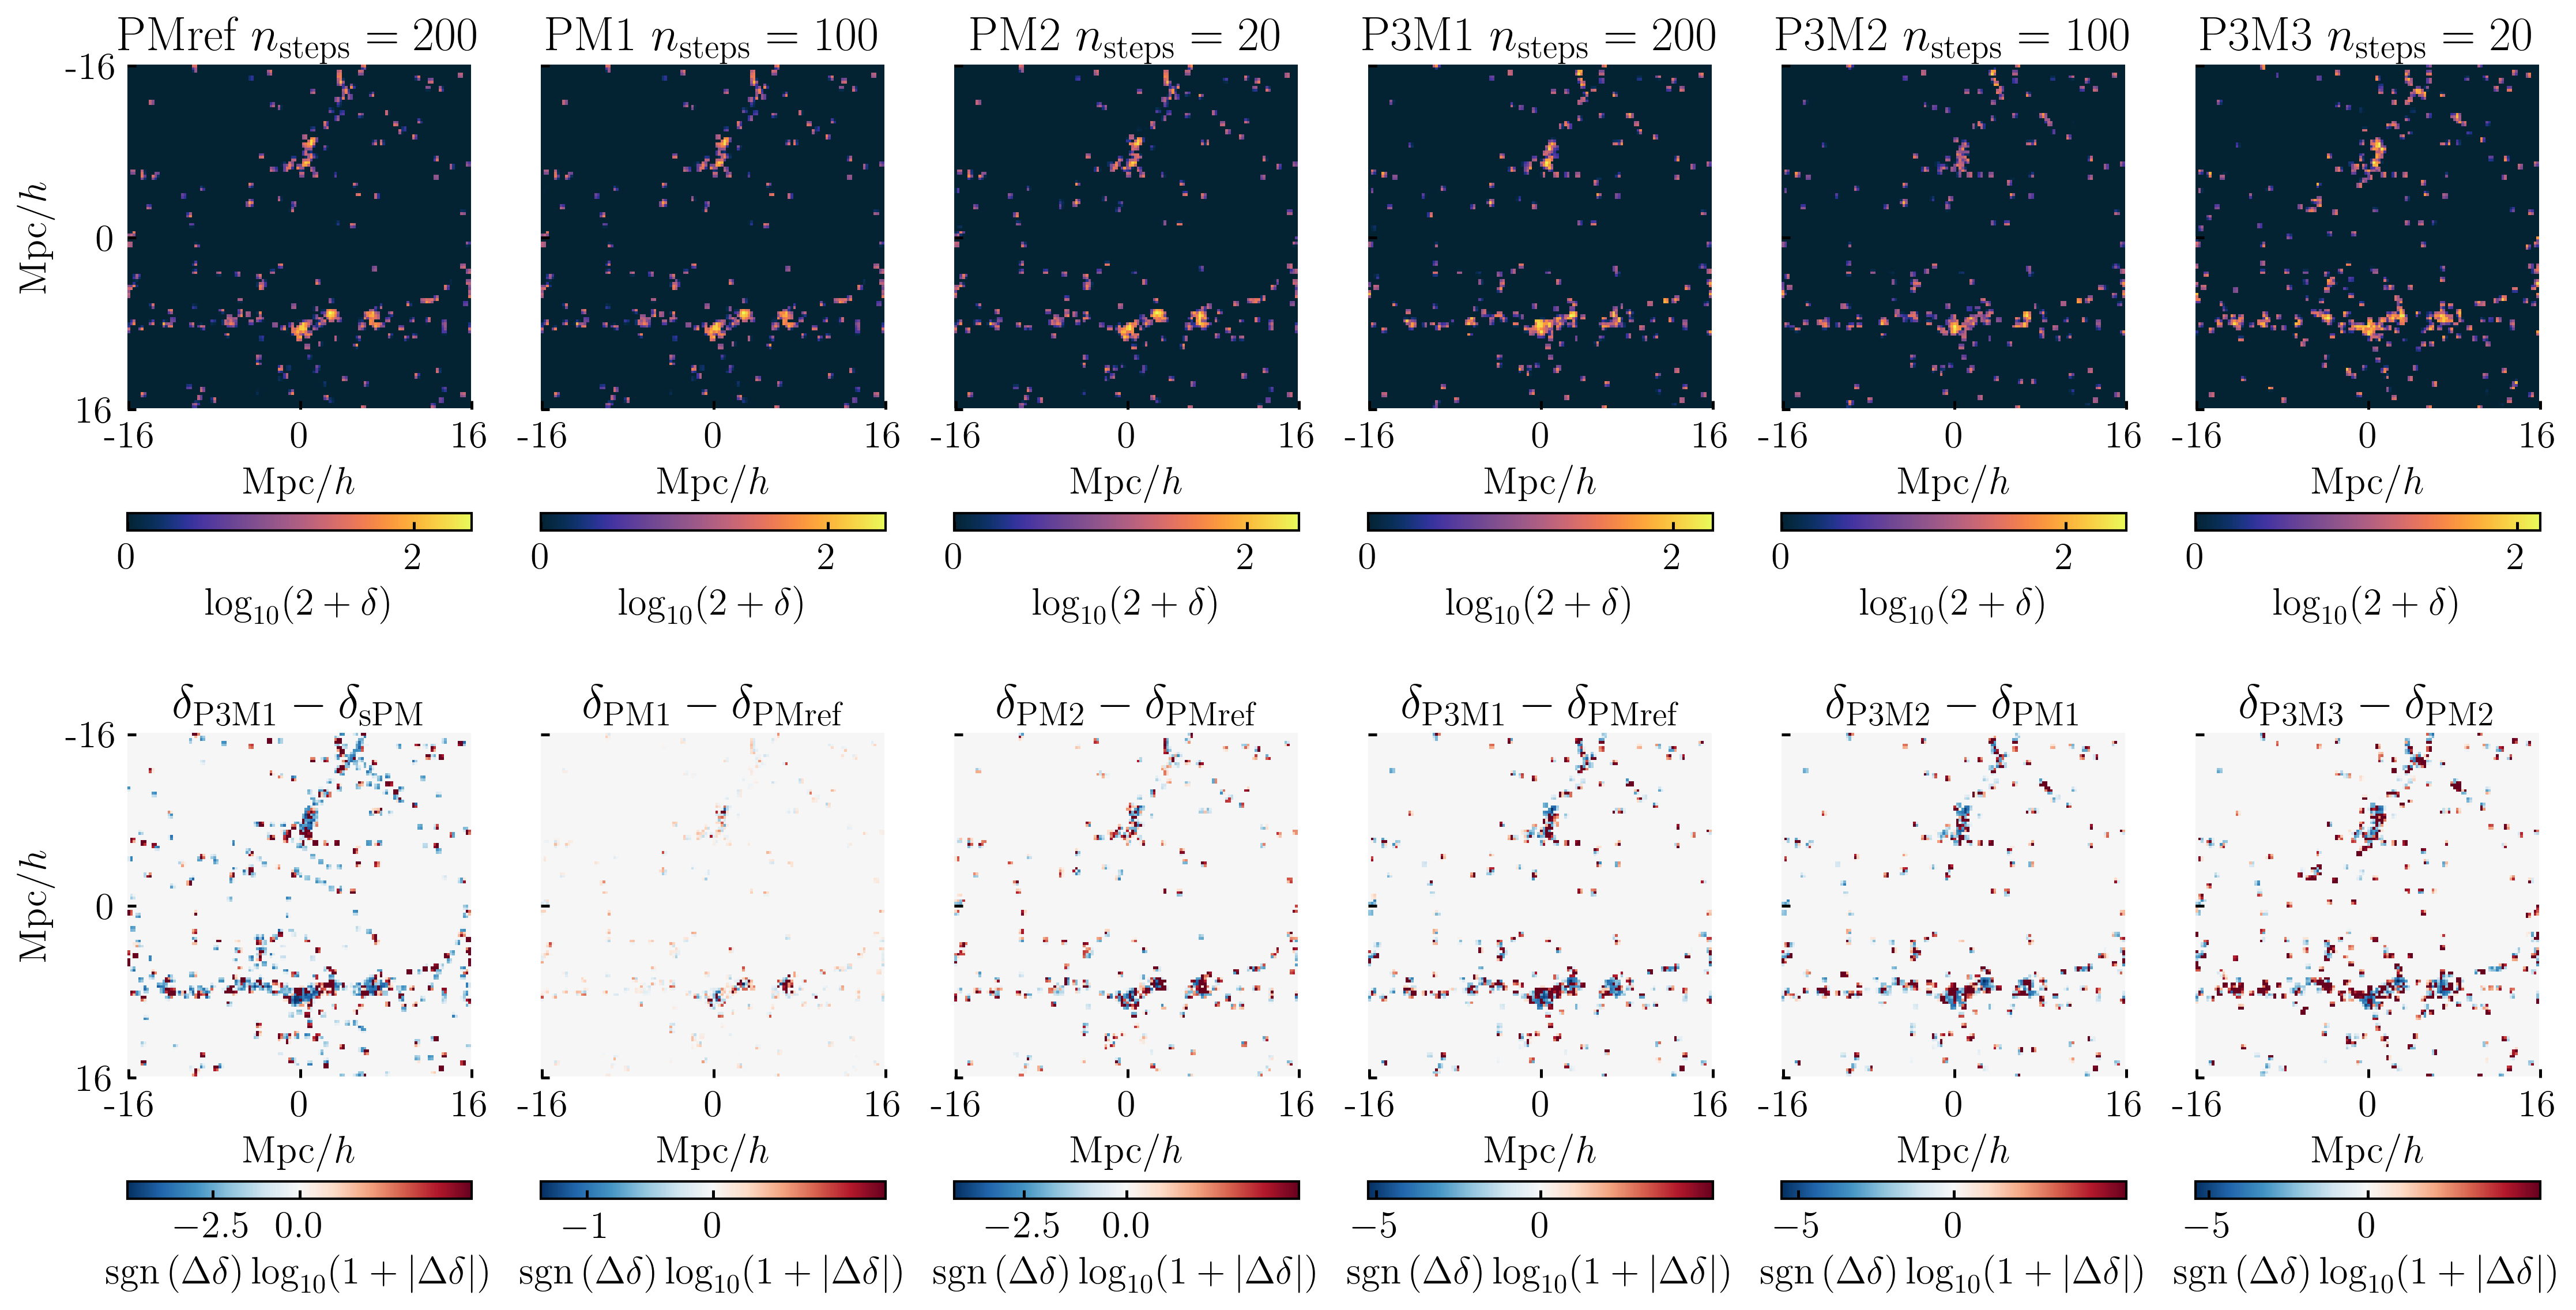

In [5]:
fields = ["pmref", "pm1", "pm2", "p3m1", "p3m2", "p3m3", "diff_p3m1_spm", "diff_pm1_pmref", "diff_pm2_pmref", "diff_p3m1_pmref", "diff_p3m2_pm1", "diff_p3m3_pm2"]  # fields to plot
# fields = ["lpt", "pmref", "pm1", "pm2", "cola", "spm", "p3m1", "p3m2", "p3m3", "diff_p3m1_spm", "diff_pm1_pmref", "diff_pm2_pmref", "diff_p3m1_pmref", "diff_p3m2_pm1", "diff_p3m3_pm2"]  # fields to plot

figname = "_".join(fields)
slices_dict = {
    "lpt": DELTA_LPT,
    "cola": DELTA_COLA,
    "pmref": DELTA_PMREF,
    "pm1": DELTA_PM1,
    "pm2": DELTA_PM2,
    "spm": DELTA_SPM,
    "p3m1": DELTA_P3M1,
    "p3m2": DELTA_P3M2,
    "p3m3": DELTA_P3M3,
    "diff_pm1_pmref": diff_pm1_pmref,
    "diff_pm2_pmref": diff_pm2_pmref,
    "diff_p3m1_pmref": diff_p3m1_pmref,
    "diff_p3m2_pm1": diff_p3m2_pm1,
    "diff_p3m3_pm2": diff_p3m3_pm2,
    "diff_p3m1_spm": diff_p3m1_spm,
}
titles_dict = {
    "lpt": "LPT",
    "pmref": f"PMref $n_\\mathrm{{steps}}={nsteps_pmref}$",
    "pm1": f"PM1 $n_\\mathrm{{steps}}={nsteps_pm1}$",
    "pm2": f"PM2 $n_\\mathrm{{steps}}={nsteps_pm2}$",
    "cola": f"COLA $n_\\mathrm{{steps}}={nsteps_cola}$",
    "spm": f"sPM $n_\\mathrm{{steps}}={nsteps_spm}$",
    "p3m1": f"P3M1 $n_\\mathrm{{steps}}={nsteps_p3m1}$",
    "p3m2": f"P3M2 $n_\\mathrm{{steps}}={nsteps_p3m2}$",
    "p3m3": f"P3M3 $n_\\mathrm{{steps}}={nsteps_p3m3}$",
    "diff_pm1_pmref": r"$\delta_{\rm PM1}-\delta_{\rm PMref}$",
    "diff_pm2_pmref": r"$\delta_{\rm PM2}-\delta_{\rm PMref}$",
    "diff_p3m1_pmref": r"$\delta_{\rm P3M1}-\delta_{\rm PMref}$",
    "diff_p3m2_pm1": r"$\delta_{\rm P3M2}-\delta_{\rm PM1}$",
    "diff_p3m3_pm2": r"$\delta_{\rm P3M3}-\delta_{\rm PM2}$",
    "diff_p3m1_spm": r"$\delta_{\rm P3M1}-\delta_{\rm sPM}$",
}

ncols = 6  # Max panels per row
npanels = len(fields)
nrows = np.ceil(npanels / ncols).astype(int)

fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(3 * ncols, 4.6 * nrows), sharey=True
)

axs = axs.flatten()
ims = []

for i, key in enumerate(fields):
    ax = axs[i]
    data = slices_dict[key]
    title = titles_dict[key]

    if key.startswith("diff"):
        norm = TwoSlopeNorm(
            vmin=-np.log(1 + np.abs(np.min(data))),
            vcenter=0,
            vmax=np.log10(1 + np.abs(np.max(data))),
        )
        im = ax.imshow(
            np.sign(data) * np.log(1 + np.abs(data)), cmap="RdBu_r", norm=norm
        )
    else:
        im = ax.imshow(np.log10(2 + data), cmap=cmap)

    ims.append((im, key))
    ax.set_title(title, fontsize=fs_titles)
    for spine in ax.spines.values():
        spine.set_visible(False)

# Hide unused axes
for i in range(npanels, len(axs)):
    axs[i].axis("off")

# Shared axes labels
for i, ax in enumerate(axs[:npanels]):
    if i % ncols == 0:
        ax.set_yticks([0, N // 2, N])
        ax.set_yticklabels([f"{-L/2:.0f}", "0", f"{L/2:.0f}"], fontsize=fs)
        ax.set_ylabel(r"Mpc/$h$", size=GLOBAL_FS_SMALL)

    ax.set_xticks([0, N // 2, N])
    ax.set_xticklabels([f"{-L/2:.0f}", "0", f"{L/2:.0f}"], fontsize=fs)
    ax.set_xlabel(r"Mpc/$h$", size=GLOBAL_FS_SMALL)

# Colorbars
for ax, (im, key) in zip(axs[:npanels], ims):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.6)
    cb = fig.colorbar(im, cax=cax, orientation="horizontal")
    if key.startswith("diff"):
        cb.set_label(
            r"$\textrm{sgn}\left(\Delta\delta\right)\log_{10}(1 + |\Delta\delta|)$",
            fontsize=fs,
        )
    else:
        cb.set_label(r"$\log_{10}(2 + \delta)$", fontsize=fs)
    cb.ax.tick_params(labelsize=fs)
    cax.xaxis.set_ticks_position("bottom")
    cax.xaxis.set_label_position("bottom")

fig.savefig(simdir + f"{figname}.png", bbox_inches="tight", dpi=300, transparent=True)
fig.savefig(simdir + f"{figname}.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [6]:
full_field_p3m1 = np.log10(2+read_field(simdir + f"p3m1_nsteps{nsteps_p3m1}_final_density_p3m.h5").data)

if N <= 128:
    fig = plotly_3d(full_field_p3m1, size=N, L=L, colormap=thermal_plotly, limits="default")
else:
    # Downsample the grid for visualisation
    downsample_factor = N // 128
    downsampled_field = full_field_p3m1[
        ::downsample_factor, ::downsample_factor, ::downsample_factor
    ]
    fig = plotly_3d(downsampled_field, size=N, L=L, colormap=thermal_plotly, limits="default")

fig.show()
clear_large_plot(fig)  # Uncomment to clear the Plotly figure to avoid memory issues

### Compute and plot the power spectra of the evolved dark matter fields

In [7]:
G = read_FourierGrid(input_ss_file)
k = G.k_modes[1:]
AliasingCorr = False

DELTA = read_field(simdir + "initial_density.h5")
Pk_INI, Vk_INI = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_INI, Vk_INI = Pk_INI[1:], Vk_INI[1:]
Sk_INI = np.sqrt(Vk_INI)

DELTA = read_field(simdir + "lpt_density.h5")
Pk_LPT, Vk_LPT = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_LPT, Vk_LPT = Pk_LPT[1:], Vk_LPT[1:]
Sk_LPT = np.sqrt(Vk_LPT)

DELTA = read_field(simdir + f"pmref_nsteps{nsteps_pmref}_final_density_pm.h5")
Pk_PMref, Vk_PMref = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_PMref, Vk_PMref = Pk_PMref[1:], Vk_PMref[1:]
Sk_PMref = np.sqrt(Vk_PMref)

DELTA = read_field(simdir + f"pm1_nsteps{nsteps_pm1}_final_density_pm.h5")
Pk_PM1, Vk_PM1 = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_PM1, Vk_PM1 = Pk_PM1[1:], Vk_PM1[1:]
Sk_PM1 = np.sqrt(Vk_PM1)

DELTA = read_field(simdir + f"pm2_nsteps{nsteps_pm2}_final_density_pm.h5")
Pk_PM2, Vk_PM2 = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_PM2, Vk_PM2 = Pk_PM2[1:], Vk_PM2[1:]
Sk_PM2 = np.sqrt(Vk_PM2)

DELTA = read_field(simdir + f"cola_nsteps{nsteps_cola}_final_density_cola.h5")
Pk_COLA, Vk_COLA = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_COLA, Vk_COLA = Pk_COLA[1:], Vk_COLA[1:]
Sk_COLA = np.sqrt(Vk_COLA)

DELTA = read_field(simdir + f"spm_nsteps{nsteps_spm}_final_density_spm.h5")
Pk_sPM, Vk_sPM = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_sPM, Vk_sPM = Pk_sPM[1:], Vk_sPM[1:]
Sk_sPM = np.sqrt(Vk_sPM)

DELTA = read_field(simdir + f"p3m1_nsteps{nsteps_p3m1}_final_density_p3m.h5")
Pk_P3M1, Vk_P3M1 = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_P3M1, Vk_P3M1 = Pk_P3M1[1:], Vk_P3M1[1:]
Sk_P3M1 = np.sqrt(Vk_P3M1)

DELTA = read_field(simdir + f"p3m2_nsteps{nsteps_p3m2}_final_density_p3m.h5")
Pk_P3M2, Vk_P3M2 = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_P3M2, Vk_P3M2 = Pk_P3M2[1:], Vk_P3M2[1:]
Sk_P3M2 = np.sqrt(Vk_P3M2)

DELTA = read_field(simdir + f"p3m3_nsteps{nsteps_p3m3}_final_density_p3m.h5")
Pk_P3M3, Vk_P3M3 = get_autocorrelation(DELTA, G, AliasingCorr)
Pk_P3M3, Vk_P3M3 = Pk_P3M3[1:], Vk_P3M3[1:]
Sk_P3M3 = np.sqrt(Vk_P3M3)

[23:34:32|STATUS    ]|Read Fourier grid in data file '/Users/hoellinger/WIP3M/ts1/input_ss_k_grid.h5'...
[23:34:32|DIAGNOSTIC]==|L0=32.0, L1=32.0, L2=32.0
[23:34:32|DIAGNOSTIC]==|N0=128, N1=128, N2=128, N2_HC=65, N_HC=1064960, NUM_MODES=58
[23:34:32|STATUS    ]|Read Fourier grid in data file '/Users/hoellinger/WIP3M/ts1/input_ss_k_grid.h5' done.
[23:34:32|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/initial_density.h5'...
[23:34:32|DIAGNOSTIC]==|ranges=[np.float64(-16.0), np.float64(16.0), np.float64(-16.0), np.float64(16.0), np.float64(-16.0), np.float64(16.0), np.int32(128), np.int32(128), np.int32(128)]
[23:34:32|STATUS    ]|Read field in data file '/Users/hoellinger/WIP3M/ts1/initial_density.h5' done.
[23:34:32|STATUS    ]|Getting auto-correlation in Fourier space (using 8 cores)...
[23:34:32|STATUS    ][23:34:32|STATUS    ]|Getting auto-correlation in Fourier space (using 8 cores) done.
|Read field in data file '/Users/hoellinger/WIP3M/ts1/lpt_density.h5'...
[2

kmin = 0.6773208379745483, kmax = 20.65121078491211
Nyquist (density grid): 12.57 h/Mpc
Nyquist (PM grid): 6.28 h/Mpc
Particle wavenumber: 104.72 h/Mpc
Split wavenumber: 10.05 h/Mpc
Short-range reach: 2.23 h/Mpc


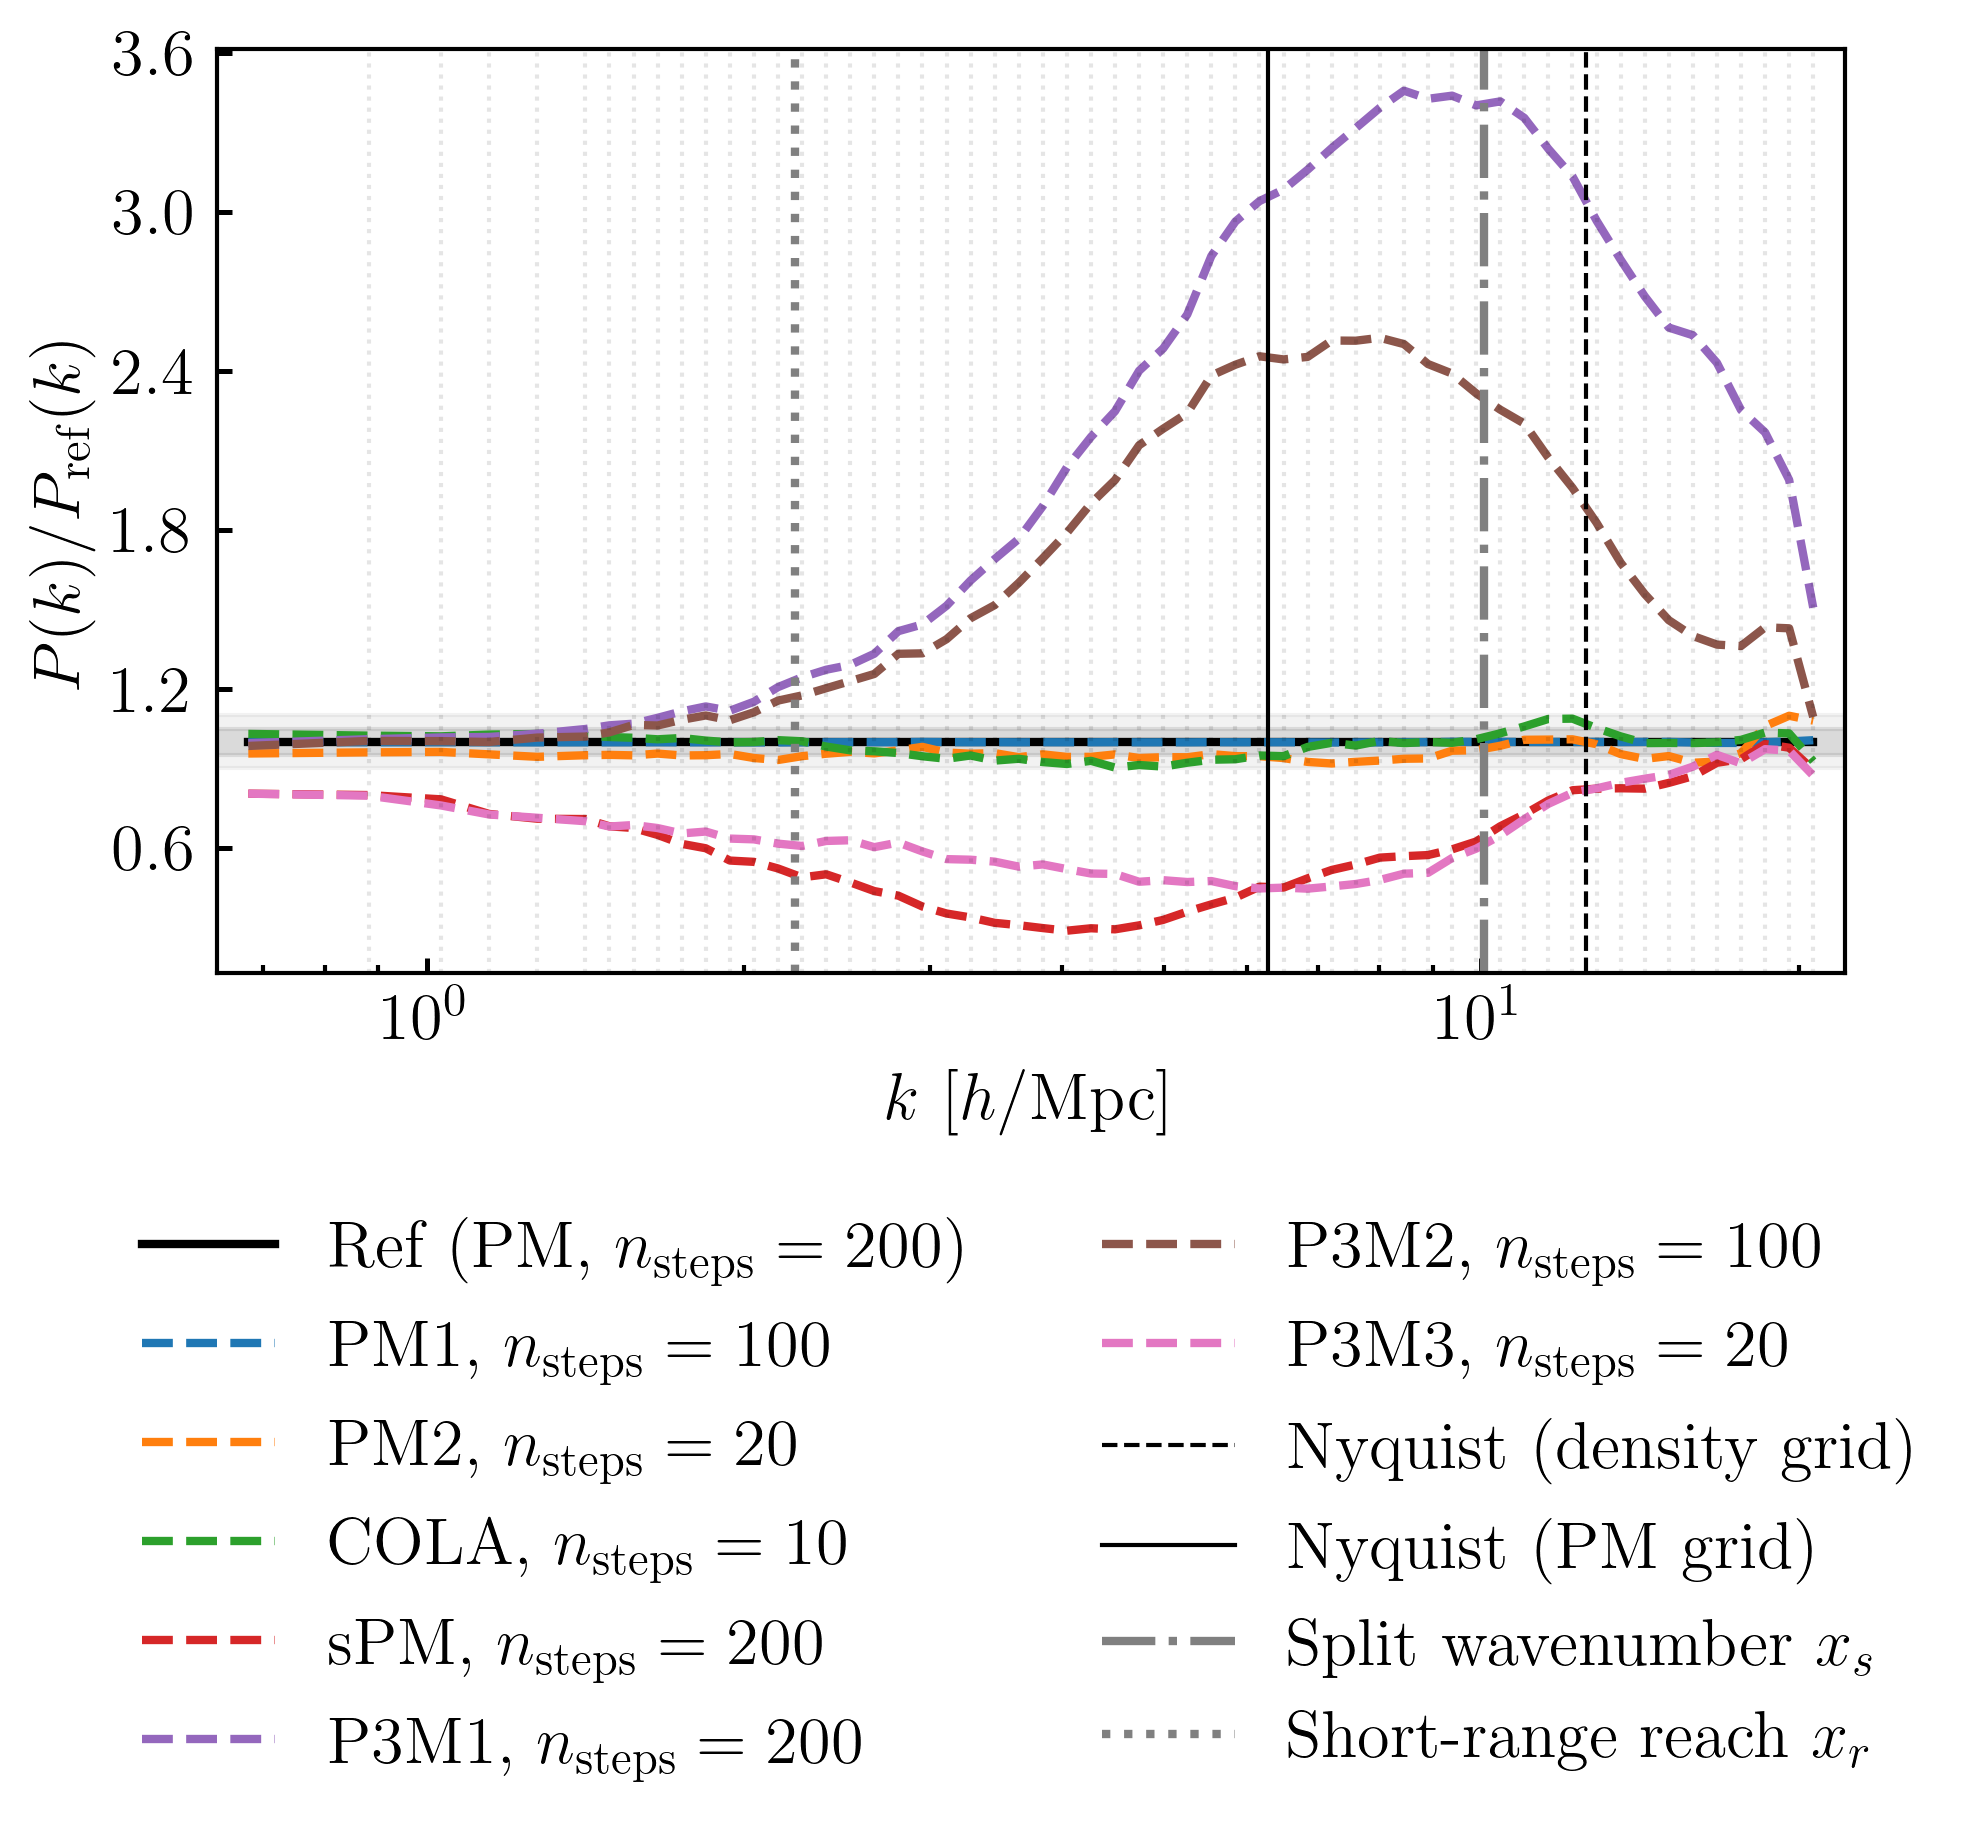

In [8]:
Pk_ref = Pk_PMref

fig, ax = plt.subplots(figsize=(7, 4))

ax.set_xscale("log")
k = G.k_modes[1:]
kmin, kmax = k.min(), k.max()
print(f"kmin = {kmin}, kmax = {kmax}")
log_pad = 0.02
log_k_min = np.log10(kmin)
log_k_max = np.log10(kmax)
log_range = log_k_max - log_k_min
xlim_min = 10 ** (log_k_min - log_pad * log_range)
xlim_max = 10 ** (log_k_max + log_pad * log_range)

plt.xlim(xlim_min, xlim_max)
# ax.set_ylim([0.2, 1.8])
dark_grey_bnd = 0.05
light_grey_bnd = 0.1

label_ref = f"Ref (PM, $n_\\mathrm{{steps}}={nsteps_pmref}$)"

ax.plot([kmin, kmax], [1, 1], color="black", linestyle="-", label=label_ref)
# ax.plot(k, Pk_LPT / Pk_ref, label="2LPT", linestyle="--")
fields_to_plot = [
    ("PM1", Pk_PM1),
    ("PM2", Pk_PM2),
    ("COLA", Pk_COLA),
    ("sPM", Pk_sPM),
    ("P3M1", Pk_P3M1),
    ("P3M2", Pk_P3M2),
    ("P3M3", Pk_P3M3),
]
for field_name, Pk in fields_to_plot:
    label = f"{field_name}, $n_\\mathrm{{steps}}={eval(f'nsteps_{field_name.lower()}')}$"
    ax.plot(k, Pk / Pk_ref, label=label, linestyle="--")

ax.axhspan(1 - dark_grey_bnd, 1 + dark_grey_bnd, color="grey", alpha=0.2)
ax.axhspan(1 - light_grey_bnd, 1 + light_grey_bnd, color="grey", alpha=0.1)

for i in range(1, len(k)):
    ax.axvline(k[i], color="black", linestyle=":", linewidth=1, alpha=0.1)
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax.set_xlabel("$k$ [$h/\\mathrm{Mpc}$]", fontsize=fs)
ax.set_ylabel("$P(k)/P_\\mathrm{ref}(k)$", fontsize=fs)
ax.tick_params(which="both", direction="in")
ax.tick_params(axis="both", which="major", labelsize=fs)
ax.tick_params(axis="both", which="minor", labelsize=fs)

# Characteristic vertical reference scales
nyquist = np.pi * N / L
nyquist_PM = np.pi * Npm / L
epsilon = 0.03 * L / Np
particle_length = 2*epsilon
xs = 1.25 * L / Npm
xr = 4.5 * xs
particle_wavenumber = 2*np.pi / particle_length  # Too large to be shown
xs_inv = 2*np.pi / xs
xr_inv = 2*np.pi / xr
line1 = ax.axvline(x=nyquist, color="black", linestyle="--", lw=1, label="Nyquist (density grid)")
line1 = ax.axvline(x=nyquist_PM, color="black", linestyle="-", lw=1, label="Nyquist (PM grid)")
line3 = ax.axvline(x=xs_inv, color="gray", linestyle="-.", lw=2, label=r"Split wavenumber $x_s$")
line4 = ax.axvline(x=xr_inv, color="gray", linestyle=":", lw=2, label=r"Short-range reach $x_r$")
print(f"Nyquist (density grid): {nyquist:.2f} h/Mpc")
print(f"Nyquist (PM grid): {nyquist_PM:.2f} h/Mpc")
print(f"Particle wavenumber: {particle_wavenumber:.2f} h/Mpc")
print(f"Split wavenumber: {xs_inv:.2f} h/Mpc")
print(f"Short-range reach: {xr_inv:.2f} h/Mpc")

empty_patch = mpatches.Patch(color="none", label="")
handles, labels = plt.gca().get_legend_handles_labels()
# handles = [empty_patch, *handles]
# labels = ["", *labels]
plt.legend(
    handles,
    labels,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, -0.2),
    fontsize=fs,
    frameon=False,
)
fig.savefig(
    simdir + "power_spectra.png",
    bbox_inches="tight",
    dpi=300,
    transparent=True,
)
fig.savefig(
    simdir + "power_spectra.pdf",
    bbox_inches="tight",
    dpi=300,
)
plt.show()